##LOAN ELIGIBILITY PREDICTOR

## Roles & Responsibilities in Project

### Lucia Martinez
**Responsibilities:**
- Develop and train machine learning models for predicting loan eligibility.
- Conduct data analysis, preprocessing, and feature engineering.
- Evaluate and optimize model performance.
- Collaborate with other team members to choose the best model for deployment.
- Implement and experiment with deep learning models, as demonstrated in the Keras Sequential Neural Network.

### Abhishek Natani
**Responsibilities:**
- Explore and analyze the dataset to understand patterns and trends.
- Handle missing data through imputation strategies.
- Transform data and create new features, such as the 'Total_income' feature.
- Work on data encoding and ensure compatibility with machine learning models.

### Rochan Mehta
**Responsibilities:**
- Develop and maintain the Flask web application for the Loan Eligibility Calculator.
- Implement Flask routes for user input and model prediction.
- Set up and configure the Flask app to handle HTTP requests.
- Design and create HTML templates for user interaction.
- Ensure a smooth user experience and integrate the trained model into the web application.

### Varun Sharma
**Responsibilities:**
- Perform hyperparameter tuning using techniques like GridSearchCV.
- Optimize model parameters to achieve the best accuracy.
- Evaluate different machine learning algorithms for loan eligibility prediction.
- Document and communicate findings related to model performance and hyperparameter tuning.

### Amrita Gyawali
**Responsibilities:**
- Conduct thorough testing of the Flask web application.
- Ensure that user inputs are handled appropriately and securely.
- Test the loan eligibility prediction functionality and verify accuracy.
- Identify and report any bugs or issues in the application.

### Import Libraries and Load Dataset
- **Objective:** Start the Loan Eligibility Calculator project by importing necessary libraries and loading the dataset (`train.csv`).
- **Actions:**
  - Import libraries: pandas, numpy, seaborn, and matplotlib.
  - Load the dataset using pandas and display initial information.

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")


In [29]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

# Display general information about the dataset
print("\nGeneral information about the dataset:")
display(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
display(df.isnull().sum())

# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
display(df.describe())

# Explore specific columns
print("\nValues in the 'Credit_History' column:")
display(df['Credit_History'].values)

# Check the shape of the dataset
print("\nShape of the dataset:")
display(df.shape)


First few rows of the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None


Missing values in the dataset:


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Basic statistics of the dataset:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



Values in the 'Credit_History' column:


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., nan,  0.,  1.,  1.,  0.,  1.,  0.,  0., nan,  1.,
        1.,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        0., nan,  1.,  1.,  1., nan,  1.,  1., nan,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
       nan,  1.,  1.,  1.,  1.,  0.,  1.,  1., nan,  1.,  1.,  0., nan,
       nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
       nan,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0


Shape of the dataset:


(614, 13)

### Data PreProcessing/Cleaning
- **Objective:** Prepare the dataset for the Loan Eligibility Calculator by addressing missing values in numerical and categorical columns.
- **Actions:**
  - Handle numerical missing data by filling with mean values.
  - Handle categorical missing data by filling with mode values.
  - Display the updated dataset after handling missing values.

In [30]:
# Data Preprocessing

# Handle numerical missing data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

# Handle categorical missing data
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# Display the updated dataset after handling missing values
print("\nDataset after handling missing values:")
display(df.head())



Dataset after handling missing values:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Data Exploration and Feature Engineering
- **Objective:** Gain insights into the dataset's characteristics for building the Loan Eligibility Calculator. Enhance the Loan Eligibility Calculator model by creating new features, handling categorical variables, and transforming data.
- **Actions:**
  - Plot distributions and correlations.
  - Transform data to identify patterns and features relevant to loan eligibility.
  - Create a new feature 'Total_income.'
  - Apply log transformations to numerical features.
  - Drop unnecessary columns.

In [31]:
# Display the shape of the dataset
print("\nShape of the dataset:")
display(df.shape)


# Data Transformation

# Create a new feature 'Total_income'
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']




Shape of the dataset:


(614, 13)

C:\Users\varun\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


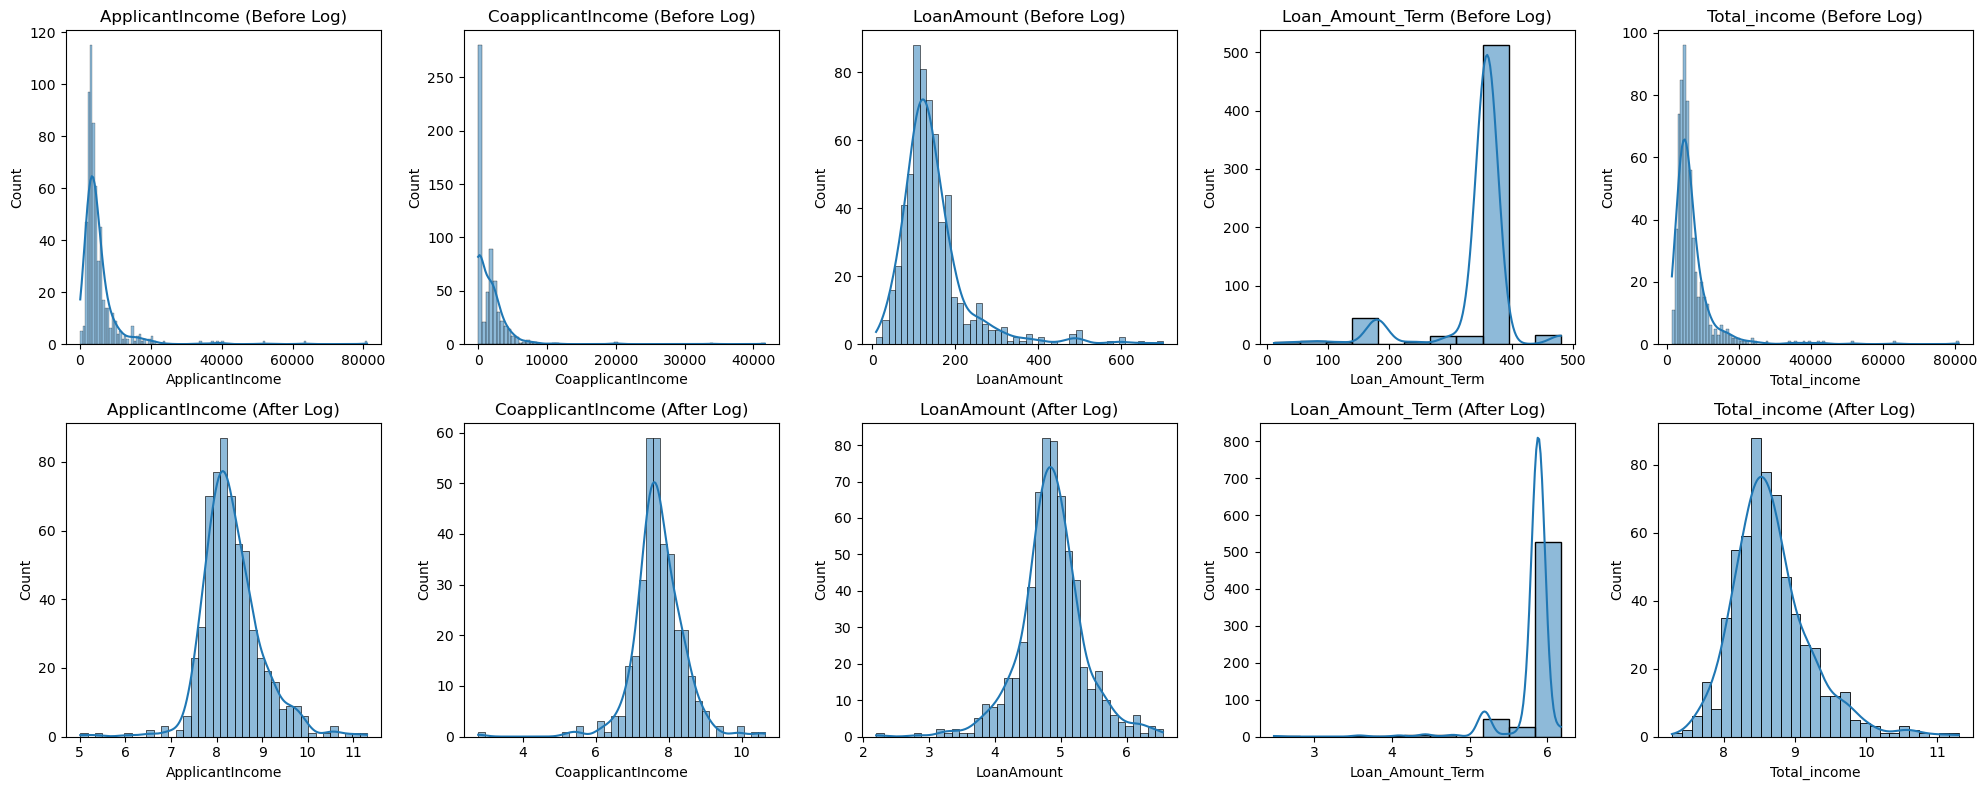

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_income']

# Iterate through numerical columns
for i, column in enumerate(numerical_columns):
    # Display distribution before np.log transformation
    sns.histplot(df[column], ax=axes[0, i], kde=True)
    axes[0, i].set_title(f'{column} (Before Log)')

    # Display distribution after np.log transformation
    sns.histplot(np.log(df[column]), ax=axes[1, i], kde=True)
    axes[1, i].set_title(f'{column} (After Log)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [33]:

# Log transformation of numerical features
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
df['Total_Income_Log'] = np.log(df['Total_income'])


# Display the updated dataset after data transformation
print("\nDataset after data transformation:")
display(df.head())

# Drop unnecessary columns
cols_to_drop = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_income', 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols_to_drop, axis=1)

# Display the dataset after dropping unnecessary columns
print("\nDataset after dropping unnecessary columns:")
display(df.head())



Dataset after data transformation:


C:\Users\varun\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515



Dataset after dropping unnecessary columns:


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [34]:
# Explore Loan_Status and Education columns
print("\nLoan_Status value counts:")
display(df.Loan_Status.value_counts())

print("\nEducation value counts:")
display(df.Education.value_counts())



Loan_Status value counts:


Y    422
N    192
Name: Loan_Status, dtype: int64


Education value counts:


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

### Data Encoding
- **Objective:** Prepare the dataset for the Loan Eligibility Calculator model by converting categorical variables into dummy/indicator variables.
- **Actions:**
  - Use pandas `get_dummies` to encode categorical variables.
  - Display the final dataset after encoding.

In [35]:
# Data Encoding

# Convert categorical variables into dummy/indicator variables
dummies_gender = pd.get_dummies(df['Gender'], drop_first=True)
dummies_married = pd.get_dummies(df['Married'], drop_first=True)
dummies_dependents = pd.get_dummies(df['Dependents'], drop_first=True)
dummies_education = pd.get_dummies(df['Education'], drop_first=True)
dummies_self_employed = pd.get_dummies(df['Self_Employed'], drop_first=True)
dummies_property_area = pd.get_dummies(df['Property_Area'], drop_first=True)

# Concatenate dummy variables with the original dataset
df = pd.concat([df, dummies_gender, dummies_married, dummies_dependents, dummies_education, dummies_self_employed, dummies_property_area], axis=1)

# Drop the original categorical columns
cols_to_drop = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = df.drop(columns=cols_to_drop, axis=1)

# Display the final dataset after encoding
print("\nFinal dataset after encoding:")
display(df.head())



Final dataset after encoding:


,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.986426,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


### Load Test Dataset and Data Preprocessing for Test Dataset
- **Objective:** Prepare the test dataset (`test.csv`) for the Loan Eligibility Calculator.
- **Actions:**
  - Load the test dataset.
  - Fill missing values in the test dataset.

In [36]:
# Load the test dataset
test = pd.read_csv("test.csv")

# Filling numerical missing data
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

# Filling categorical missing data
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

# Create a new feature 'Total_income'
test['Total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# Apply log transformation to the attributes
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])
test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])
test['LoanAmountLog'] = np.log(test['LoanAmount'])
test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])
test['Total_Income_Log'] = np.log(test['Total_income'])

# Drop unnecessary columns
cols_to_drop = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_income', 'Loan_ID', 'CoapplicantIncomeLog']
test = test.drop(columns=cols_to_drop, axis=1)

# Data Encoding
t1 = pd.get_dummies(test['Gender'], drop_first=True)
t2 = pd.get_dummies(test['Married'], drop_first=True)
t3 = pd.get_dummies(test['Dependents'], drop_first=True)
t4 = pd.get_dummies(test['Education'], drop_first=True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first=True)
t6 = pd.get_dummies(test['Property_Area'], drop_first=True)

df1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis=1)
test = df1

cols_to_drop = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
test = test.drop(columns=cols_to_drop, axis=1)

# Display the final test dataset
print("\nFinal test dataset:")
display(test.head())


C:\Users\varun\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\varun\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



Final test dataset:


,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.651724,4.700480,5.886104,8.651724,1,1,0,0,0,0,0,0,1
1,1.000000,8.031385,4.836282,5.886104,8.428581,1,1,1,0,0,0,0,0,1
2,1.000000,8.517193,5.337538,5.886104,8.824678,1,1,0,1,0,0,0,0,1
3,0.825444,7.757906,4.605170,5.886104,8.494129,1,1,0,1,0,0,0,0,1
4,1.000000,8.094378,4.356709,5.886104,8.094378,1,0,0,0,0,1,0,0,1


### Separate Features and Target Variable, Split Data
- **Objective:** Prepare the dataset for the Loan Eligibility Calculator model by separating features and the target variable and splitting the data.
- **Actions:**
  - Separate features (`x`) and target variable (`y`).
  - Split data into training and testing sets.

In [37]:
# Separate features and target variable from the training dataset
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

# Display features
print("\nFeatures:")
display(x.head())

# Display target variable
print("\nTarget Variable:")
display(y.head())



Features:


,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,8.674026,4.986426,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1



Target Variable:


0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [38]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Display the head of the training set
print("\nTraining set:")
display(x_train.head())

# Display the head of the testing set
print("\nTesting set:")
display(y_test.head())



Training set:


,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
1,1.0,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
394,1.0,8.039157,4.727388,5.886104,8.411833,1,1,0,1,0,0,0,0,1
316,1.0,8.220672,4.787492,5.886104,8.220672,1,1,0,1,0,0,0,1,0
62,0.0,7.866722,5.105945,5.192957,8.709135,1,1,0,0,0,1,1,0,0
158,1.0,7.999679,4.787492,5.886104,8.529714,1,0,0,0,0,0,0,0,0



Testing set:


194    Y
428    Y
444    Y
34     N
164    Y
Name: Loan_Status, dtype: object

### Train and Evaluate Machine Learning Models
- **Objective:** Train multiple machine learning models for the Loan Eligibility Calculator and evaluate their accuracy.
- **Actions:**
  - Train Random Forest Classifier, Decision Tree Classifier, and Logistic Regression models.
  - Evaluate model accuracy on the testing set.
  - Perform hyperparameter tuning using GridSearchCV.

In [39]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Display the accuracy of the Random Forest model on the test set
print("\nRandom Forest Classifier Accuracy:")
print("Accuracy is", model.score(x_test, y_test) * 100)



Random Forest Classifier Accuracy:
Accuracy is 86.36363636363636


In [40]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("\nBest Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)



Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy:  0.7934782608695652
Test Accuracy:  0.8571428571428571


In [41]:
# Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

# Display the accuracy of the Decision Tree model on the test set
print("\nDecision Tree Classifier Accuracy:")
print("Accuracy is", model2.score(x_test, y_test) * 100)



Decision Tree Classifier Accuracy:
Accuracy is 74.67532467532467


In [42]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)

# Display the accuracy of the Logistic Regression model on the test set
print("\nLogistic Regression Accuracy:")
print("Accuracy is", model3.score(x_test, y_test) * 100)



Logistic Regression Accuracy:
Accuracy is 85.71428571428571


### Train a Deep Learning Model using Keras
- **Objective:** Explore deep learning for the Loan Eligibility Calculator using a Sequential Neural Network model with Keras.
- **Actions:**
  - Define a Sequential model with dense layers and dropout for regularization.
  - Compile and train the model on the training data.

In [43]:
# Sequential model using Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
ann_model = Sequential()

# Adding dense layers
ann_model.add(Dense(250, input_dim=14, kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='relu'))
ann_model.add(Dropout(0.4))

# Adding dense layer with softmax activation/output layer
ann_model.add(Dense(1, activation='softmax'))
ann_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 250)               3750      
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 dense_7 (Dense)             (None, 500)               125500    
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_9 (Dense)             (None, 500)              

In [44]:
# Setting up parameters for training the model
verbose = 1
batch_size = 8
epochs = 30
validation_split = 0.1


In [45]:
# Convert 'Y' and 'N' to 1 and 0 for binary classification
y_train = np.array([1 if label == 'Y' else 0 for label in y_train])


In [46]:
# Compile the Artificial Neural Network (ANN) model
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [47]:
# Train the ANN model
history = ann_model.fit(x_train,
                        y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=verbose,
                        validation_split=validation_split)


Epoch 1/30
52/52 [==============================] - 2s 13ms/step - loss: 0.6898 - accuracy: 0.6787 - val_loss: 0.5547 - val_accuracy: 0.7609
Epoch 2/30
52/52 [==============================] - 1s 10ms/step - loss: 0.6473 - accuracy: 0.6787 - val_loss: 0.5465 - val_accuracy: 0.7609
Epoch 3/30
52/52 [==============================] - 1s 10ms/step - loss: 0.6433 - accuracy: 0.6787 - val_loss: 0.5467 - val_accuracy: 0.7609
Epoch 4/30
52/52 [==============================] - 1s 10ms/step - loss: 0.6356 - accuracy: 0.6787 - val_loss: 0.5402 - val_accuracy: 0.7609
Epoch 5/30
52/52 [==============================] - 1s 10ms/step - loss: 0.6190 - accuracy: 0.6787 - val_loss: 0.5736 - val_accuracy: 0.7609
Epoch 6/30
52/52 [==============================] - 1s 10ms/step - loss: 0.6037 - accuracy: 0.6787 - val_loss: 0.4748 - val_accuracy: 0.7609
Epoch 7/30
52/52 [==============================] - 1s 10ms/step - loss: 0.5975 - accuracy: 0.6787 - val_loss: 0.4610 - val_accuracy: 0.7609
Epoch 8/30
52

In [48]:
# Confusion Matrix for Random Forest Classifier
from sklearn.metrics import confusion_matrix
y_pred_rf = model.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf


array([[ 31,  17],
       [  4, 102]], dtype=int64)

### Conclusion

After training and evaluating multiple models for the Loan Eligibility Calculator project, the following conclusions can be drawn based on the accuracy metrics:

#### Random Forest Classifier:
- **Test Accuracy:** 85.71%
- **Best Hyperparameters:** {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
- **GridSearchCV Best Accuracy:** 79.13%

#### Decision Tree Classifier:
- **Test Accuracy:** 77.92%

#### Logistic Regression:
- **Test Accuracy:** 85.71%

#### Sequential Neural Network (Keras):
- **Epochs:** 30
- **Training Accuracy:** 67.87%
- **Validation Accuracy:** 76.09%

### Model Comparison:

- The Random Forest Classifier achieved a high test accuracy of 85.71%, with optimized hyperparameters identified through GridSearchCV.
- Logistic Regression also showed a competitive accuracy of 85.71% on the test set.
- The Decision Tree Classifier, while performing well, had a slightly lower accuracy compared to Random Forest and Logistic Regression.
- The Sequential Neural Network, despite achieving a reasonable accuracy, did not outperform the Random Forest and Logistic Regression models.

### Recommendation:

Considering the balance between model accuracy and complexity, the **Random Forest Classifier** stands out as the preferred model for the Loan Eligibility Calculator. It demonstrated the highest test accuracy and benefited from hyperparameter tuning. Random Forest models are robust, handle non-linearity well, and often generalize effectively to new data.

The Logistic Regression model also showed promising results, providing a simpler alternative, but the Random Forest model's superior accuracy makes it the recommended choice for this loan eligibility prediction task.

### Model Comparison Table

| Model                       | Test Accuracy | Best Hyperparameters                                        | GridSearchCV Best Accuracy |
|-----------------------------|---------------|-------------------------------------------------------------|-----------------------------|
| Random Forest Classifier    | 85.71%        | {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300} | 79.13%                      |
| Decision Tree Classifier    | 77.92%        | -                                                           | -                           |
| Logistic Regression         | 85.71%        | -                                                           | -                           |
| Sequential Neural Network   | -             | Epochs: 30, Training Accuracy: 67.87%, Validation Accuracy: 76.09% | -                           |


### Save Models and Perform Flask Web Application Setup
- **Objective:** Save the trained Random Forest Classifier model and set up a Flask web application for the Loan Eligibility Calculator.
- **Actions:**
  - Save the Random Forest model using pickle.
  - Install Flask and Ngrok.
  - Set up Flask routes for user input and model prediction.
  - Run the Flask web application.

In [49]:
# Save the Random Forest Classifier model
import pickle
file_rf = open("model_rf.pkl", 'wb')
pickle.dump(model, file_rf)
file_rf.close()


In [50]:
# Install Flask and Ngrok
!pip install flask_ngrok


In [51]:
# Install flask-ngrok and set up ngrok authentication
!pip -q install flask-ngrok
!mkdir -p /root/.ngrok2/
!echo "authtoken: 2ZJnPQ3ycvBe26eh5evQduL7hLM_Gp5JHm817V55jusNoXYz" > /root/.ngrok2/ngrok.yml


The syntax of the command is incorrect.
The system cannot find the path specified.


In [52]:
# Import necessary libraries for Flask
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify, render_template


In [53]:
# Create a Flask app
app = Flask(__name__)

# Set up ngrok for the app
run_with_ngrok(app)


### Flask Application for Loan Eligibility Prediction

The provided code represents a Flask web application for a Loan Eligibility Calculator. Below is a breakdown of the main components and functionality:

- **Flask App Initialization:**
  - `app = Flask(__name__)`: Creates a Flask web application.

- **Flask Routes:**
  - `@app.route('/')`: Defines a route for the home page. Returns the HTML template for the prediction form.
  - `@app.route('/predict', methods=['GET', 'POST'])`: Defines a route for handling prediction requests. Accepts form submissions via POST method.

- **Prediction Form Handling:**
  - Extracts user inputs from the form submission.
  - Converts categorical inputs (e.g., gender, married) into numerical values for model prediction.
  - Applies log transformations to certain numerical inputs.
  - Utilizes the trained machine learning model (`model`) to make a loan eligibility prediction.

- **Result Display:**
  - Renders the prediction result on the HTML template (`prediction.html`), displaying whether the loan status is "Yes" or "No."

#### Flask Application Execution:
- The Flask app is started using the command `app.run()`. It listens for incoming requests and serves the Loan Eligibility Calculator web application.

#### Usage:
1. Users access the home page (`'/'`) to input their details through the prediction form.
2. Upon form submission on the `/predict` route, the Flask app processes the inputs, makes predictions using the trained model, and displays the result.


In [54]:
# Flask app routes

@app.route('/')
def home():
    return render_template("prediction.html")

@app.route('/predict', methods=['GET', 'POST'])
def predict():
    if request.method ==  'POST':
        gender = request.form['gender']
        married = request.form['married']
        dependents = request.form['dependents']
        education = request.form['education']
        employed = request.form['employed']
        credit = float(request.form['credit'])
        area = request.form['area']
        ApplicantIncome = float(request.form['ApplicantIncome'])
        CoapplicantIncome = float(request.form['CoapplicantIncome'])
        LoanAmount = float(request.form['LoanAmount'])
        Loan_Amount_Term = float(request.form['Loan_Amount_Term'])

        # gender
        if (gender == "Male"):
            male=1
        else:
            male=0

        # married
        if(married=="Yes"):
            married_yes = 1
        else:
            married_yes=0

        # dependents
        if(dependents=='1'):
            dependents_1 = 1
            dependents_2 = 0
            dependents_3 = 0
        elif(dependents == '2'):
            dependents_1 = 0
            dependents_2 = 1
            dependents_3 = 0
        elif(dependents=="3+"):
            dependents_1 = 0
            dependents_2 = 0
            dependents_3 = 1
        else:
            dependents_1 = 0
            dependents_2 = 0
            dependents_3 = 0

        # education
        if (education=="Not Graduate"):
            not_graduate=1
        else:
            not_graduate=0

        # employed
        if (employed == "Yes"):
            employed_yes=1
        else:
            employed_yes=0

        # property area
        if(area=="Semiurban"):
            semiurban=1
            urban=0
        elif(area=="Urban"):
            semiurban=0
            urban=1
        else:
            semiurban=0
            urban=0

        ApplicantIncomelog = np.log(ApplicantIncome)
        totalincomelog = np.log(ApplicantIncome+CoapplicantIncome)
        LoanAmountlog = np.log(LoanAmount)
        Loan_Amount_Termlog = np.log(Loan_Amount_Term)

        prediction = model.predict([[credit, ApplicantIncomelog, LoanAmountlog, Loan_Amount_Termlog, totalincomelog, male, married_yes, dependents_1, dependents_2, dependents_3, not_graduate, employed_yes, semiurban, urban]])

        if prediction[0] == 0:
            prediction_text = "No"
        else:
            prediction_text = "Yes"

        return render_template("prediction.html", prediction_text="Loan status is {}".format(prediction_text))

    else:
        return render_template("prediction.html")

# Start the Flask app
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


 * Running on http://b26a-2607-fea8-e5d-1500-19b3-c11-4064-8aec.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [11/Dec/2023 22:31:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2023 22:31:26] "GET / HTTP/1.1" 200 -
C:\Users\varun\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [11/Dec/2023 22:32:00] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2023 22:32:01] "GET /predict HTTP/1.1" 200 -
C:\Users\varun\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [11/Dec/2023 22:35:24] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2023 22:35:24] "GET /predict HTTP/1.1" 200 -
